# Classifications

Outline:
- Linear
- Decision Tree
- Random Forest
- Model Selection

In [8]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [9]:
dataset = pd.read_csv("../data/synth_covid.csv")
dataset

,blood_pressure,lung_capacity,body_temperature,has_covid
0,132.894691,6.931665,39.270112,0
1,117.128239,6.715135,37.005833,1
2,108.982006,6.580677,38.079465,0
3,112.337762,5.482720,37.662576,0
4,113.165263,6.664360,36.922810,1
...,...,...,...,...
995,116.208860,7.408413,37.088040,0
996,108.632769,6.854598,36.226869,1
997,137.732933,3.548004,35.543415,0
998,108.552490,2.931925,37.007822,0


In [3]:
dataset.isnull().mean()

blood_pressure      0.0
lung_capacity       0.0
body_temperature    0.0
has_covid           0.0
dtype: float64

<AxesSubplot:>

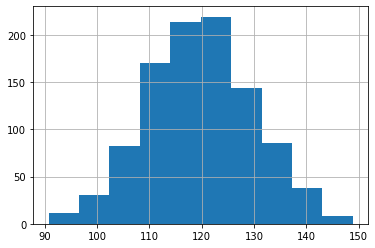

In [4]:
dataset['blood_pressure'].hist()

<AxesSubplot:>

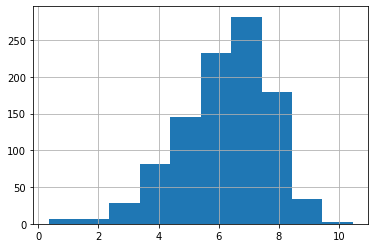

In [5]:
dataset['lung_capacity'].hist()

In [6]:
dataset['has_covid'].value_counts(normalize=True)

0    0.636
1    0.364
Name: has_covid, dtype: float64

<AxesSubplot:ylabel='has_covid'>

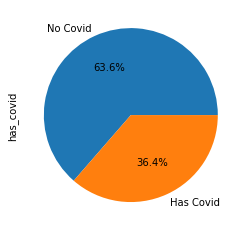

In [7]:
dataset['has_covid'].value_counts(normalize=True).plot.pie(labels=['No Covid','Has Covid'],autopct='%1.1f%%')

In [8]:
dataset.columns

Index(['blood_pressure', 'lung_capacity', 'body_temperature', 'has_covid'], dtype='object')

In [10]:
y = dataset['has_covid']
X = dataset[['blood_pressure','lung_capacity','body_temperature']]

#### Let's Divide the Dataset

In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2)

In [11]:
X_train

,blood_pressure,lung_capacity,body_temperature
824,129.323512,5.723315,37.539135
601,111.801542,4.493711,37.329403
396,122.477556,5.869039,37.801481
391,123.418079,7.049291,37.360305
875,131.571638,8.449260,38.273801
...,...,...,...
450,130.885982,6.126346,37.429036
148,115.202915,4.828425,36.333952
327,130.854607,6.076635,36.492276
340,132.223650,7.723769,36.300796


In [12]:
X_test

,blood_pressure,lung_capacity,body_temperature
131,110.597403,4.468911,37.815075
354,116.655227,6.215133,38.023423
120,109.050518,4.560350,38.185116
687,118.354962,6.249987,36.897761
853,112.499886,2.743520,38.264776
...,...,...,...
278,112.874496,4.982978,36.596142
6,126.922731,4.326772,38.711089
671,116.894512,6.930069,38.353200
370,116.966156,6.097434,36.642173


In [13]:
y_train

22     0
566    0
706    0
550    0
657    1
      ..
973    0
49     1
535    1
558    0
327    1
Name: has_covid, Length: 800, dtype: int64

## Logistic Regression:

 - If you use linear regression in classification setting, the predicted y will be in continuous variables and not guaranteed to be between 0 and 1
 - Since we want to ensure that the predicted y is in between 0 and 1 to represent probability of "has_covid", we will use logistic regression
 - Further reading: [Difference between linear regression and logistic classifier](https://www.analyticsvidhya.com/blog/2020/12/beginners-take-how-logistic-regression-is-related-to-linear-regression/#:~:text=The%20Differences%20between%20Linear%20Regression,Logistic%20regression%20provides%20discreet%20output.)

#### Defining the ML class of model that you want to use

In [12]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

#### Model Creation = Training the model = Fitting the model

In [13]:
lr.fit(X_train, y_train)

LogisticRegression()

#### Using the trained model above, predict the result on the test set

In [14]:
lr.predict_proba(X_test)[:,1]

array([0.62335514, 0.33070728, 0.35047844, 0.24353659, 0.19203719,
       0.13820545, 0.03419799, 0.3367346 , 0.62447091, 0.23401034,
       0.29421273, 0.19448643, 0.34164672, 0.11625752, 0.54246764,
       0.47874766, 0.23386901, 0.38668231, 0.21481761, 0.10637588,
       0.45352799, 0.39476972, 0.15799043, 0.33206842, 0.52275197,
       0.37402642, 0.44951626, 0.35325705, 0.42089358, 0.35950789,
       0.27422687, 0.54097929, 0.52100167, 0.56210961, 0.53861103,
       0.50543526, 0.28353298, 0.15560474, 0.25259503, 0.16220909,
       0.20965117, 0.35015158, 0.40388225, 0.11267667, 0.23712959,
       0.2423243 , 0.0758202 , 0.52099668, 0.2814938 , 0.08644651,
       0.4028875 , 0.77412438, 0.12756418, 0.35043098, 0.65821671,
       0.52073883, 0.12543529, 0.07510431, 0.34275682, 0.10993288,
       0.43783489, 0.08275954, 0.12356518, 0.43037809, 0.31233399,
       0.22297713, 0.07811103, 0.13104662, 0.08839415, 0.52701878,
       0.2104804 , 0.71741681, 0.1607538 , 0.14340326, 0.51447

In [15]:
lr.predict(X_test)

array([1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0,
       0, 0], dtype=int64)

In [16]:
y_test

751    1
67     0
111    0
514    1
419    1
      ..
356    1
322    0
243    0
841    1
914    0
Name: has_covid, Length: 200, dtype: int64

In [17]:
test_result = pd.DataFrame({'y_pred_prob':lr.predict_proba(X_test)[:,1],
                            'y_pred':lr.predict(X_test),
                            'y_test':y_test})
test_result

,y_pred_prob,y_pred,y_test
751,0.623355,1,1
67,0.330707,0,0
111,0.350478,0,0
514,0.243537,0,1
419,0.192037,0,1
...,...,...,...
356,0.763230,1,1
322,0.285350,0,0
243,0.285249,0,0
841,0.223849,0,1


## DecisionTree:

In [15]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt.predict(X_test)

array([0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0], dtype=int64)

In [16]:
dt1 = DecisionTreeClassifier(max_depth=3)
dt1.fit(X_train,y_train)
dt1.predict(X_test)

array([0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0], dtype=int64)

## Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [18]:
from sklearn.ensemble import RandomForestClassifier
rf1=RandomForestClassifier(n_estimators=150,max_depth=3)
rf1.fit(X_train,y_train)

RandomForestClassifier(max_depth=3, n_estimators=150)

## Model Selection:

### Accuracy Score

In [19]:
from sklearn.metrics import accuracy_score
AccuracyScore = {}
AccuracyScore['Linear'] = accuracy_score(y_test, lr.predict(X_test))
AccuracyScore['DecisionTree'] = accuracy_score(y_test, dt.predict(X_test))
AccuracyScore['DecisionTree: Spec'] = accuracy_score(y_test, dt1.predict(X_test))
AccuracyScore['Random Forest'] = accuracy_score(y_test, rf.predict(X_test))
AccuracyScore['Random Forest: Spec'] = accuracy_score(y_test, rf1.predict(X_test))

for key, value in AccuracyScore.items():
    print(f'{key:30}{value}')

Linear                        0.66
DecisionTree                  0.635
DecisionTree: Spec            0.65
Random Forest                 0.65
Random Forest: Spec           0.66


### ROC-AUC

In [21]:
from sklearn.metrics import roc_auc_score
ROCAUC = {}
ROCAUC['Linear'] = roc_auc_score(y_test, lr.predict(X_test))
ROCAUC['DecisionTree'] = roc_auc_score(y_test, dt.predict(X_test))
ROCAUC['DecisionTree: Spec'] = roc_auc_score(y_test, dt1.predict(X_test))
ROCAUC['Random Forest'] = roc_auc_score(y_test, rf.predict(X_test))
ROCAUC['Random Forest: Spec'] = roc_auc_score(y_test, rf1.predict(X_test))

for key, value in ROCAUC.items():
    print(f'{key:30}{value}')

Linear                        0.5809588421528721
DecisionTree                  0.6161239258254183
DecisionTree: Spec            0.5888738127544098
Random Forest                 0.6196291270918136
Random Forest: Spec           0.56558118498417


## 